## Introduction 
- Esther Hsiao
- Yuerong Hu
- Sam Walkow

Project Type II: 

The Semantic Agreement between Fictional Corpus and Real-Word Incidents: a Case Study on the Song Lyrics and News between 2000-2015.

We wanted to looked at possible connections between text in news articles and popular song lyrics in the United States for the past two decades. We wanted to see if we could detect a social pattern in two areans of written expression. We used three datasets and two different text analysis approaches to explore this potential connection. 



### Hypothesis

1. Popular songs (lyrics) and news coming out during the same period of time (etc, five years from 2001 to 2005) share certain features that were shaped by the culture and theme of the society during that period.
2. There will be a time delay between the similar groups of topics extracted from news and then those of the songs. Since news always comes out quickly right after the things happened, while it takes a long time to write and publish a song.


### Song/Lyrics Dataset

- Songs datasets from BillBoard 100 list from 1964 to 2015 with data including artist, song title, song lyrics, years and source


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bqplot as bq
from IPython.display import Image
import ipympl
%matplotlib inline

In [2]:
df = pd.read_csv("raw_data/billboard_lyrics_1964-2015.csv", encoding = "ISO-8859-1")
df.head(5)

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


### News Datasets

- News datasets from the New York Times from 2001 to 2008 and from 2009 to 2012 in xml format including columns such as headlines, authors, article content, date published, publication. 
- The two dataset had to be combined

In [3]:
news1 = open("raw_data/NewYorkTimes_CoverStory_2001-2008_2013_2015.xml", "r") 

news = news1.readlines(400)

for n in news:
    print(n)

<records>

<rec resultID="1">

  <header shortDbName="nfh" longDbName="Newspaper Source" uiTerm="112016488">

    <controlInfo>

      <bkinfo />

      <jinfo>

        <jtl>New York Times</jtl>

        <issn>03624331</issn>

      </jinfo>

      <pubinfo>

        <dt year="2015" month="12" day="31">12/31/2015</dt>

        <vid>165</vid>

        <iid>57097</iid>

      </pubinfo>

      <artinfo>

        <ppf>A1</ppf>



### Data Exploration and Cleaning
  
- Dropped NaN values
- Removed punctations, stopwords and newline characters
- Made everything lowercase
- 90-100 per year for songs
- Sampled the same number of news articles to match the song numbers
    - all from 2001-2015

### Term Frequency–Inverse Document Frequency (TF-IDF) Analysis
 - is a numerical statistic that is intended to reflect how important/representative a word is to a document in a collection or corpus
 - Each row in the datasets is a document
 - Output is a csv of top terms and terms with the highest TF-IDF socares found in both news and songs, and two measures Jarracrd and Cosine similarity

In [27]:
df_tfidf_both = pd.read_csv("TFIDF_found_in_both.csv")
df_tfidf_both.head(5)

,Window_ID,NewsYR/SongYR,N_in_both,words_in_both
0,1,2001/2001,1,space
1,1,2001/2002,1,woman
2,1,2001/2003,0,-
3,1,2001/2004,1,burn
4,1,2001/2005,0,-


In [31]:
df_tfidf_both[["NewsYR", "SongYR"]] = df_tfidf_both["NewsYR/SongYR"].str.split('/',expand=True)

In [32]:
df_tfidf_both["Year_diff"] = abs(pd.to_numeric(df_tfidf_both["SongYR"]) - pd.to_numeric(df_tfidf_both["NewsYR"]))

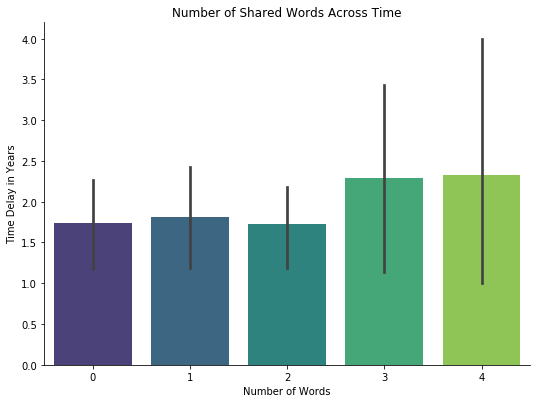

In [43]:
n = sns.catplot(x="N_in_both", y="Year_diff", 
            kind="bar", legend='full', palette='viridis',
            height=5.5, aspect=1.5, 
            data=df_tfidf_both);

n.set_axis_labels("Number of Words", "Time Delay in Years")
n.fig.set_size_inches(7.5, 5.5)
n.set(title='Number of Shared Words Across Time')


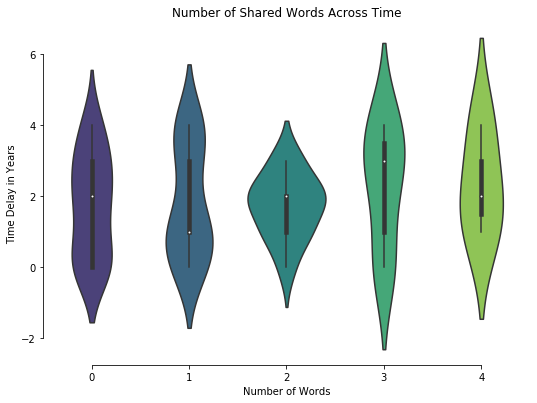

In [40]:
m = sns.catplot(x="N_in_both", y="Year_diff", 
            kind="violin", legend=True, palette='viridis',
            height=5.5, aspect=1.5,
            data=df_tfidf_both);

m.set_axis_labels("Number of Words", "Time Delay in Years")
m.fig.set_size_inches(7.5, 5.5)
m.despine(trim=True)
m.set(title='Number of Shared Words Across Time')

We can see that we have a small sample of words that appear in both the news and song lyrics, and in multiple years. From this sample we can look at the shape of the data that emerges from the time delay, and a pattern that suggests our hypthesis is on the right track. The number of shared words is quite low, and we think this may be due to the different wording style and purpose of news and songs. 

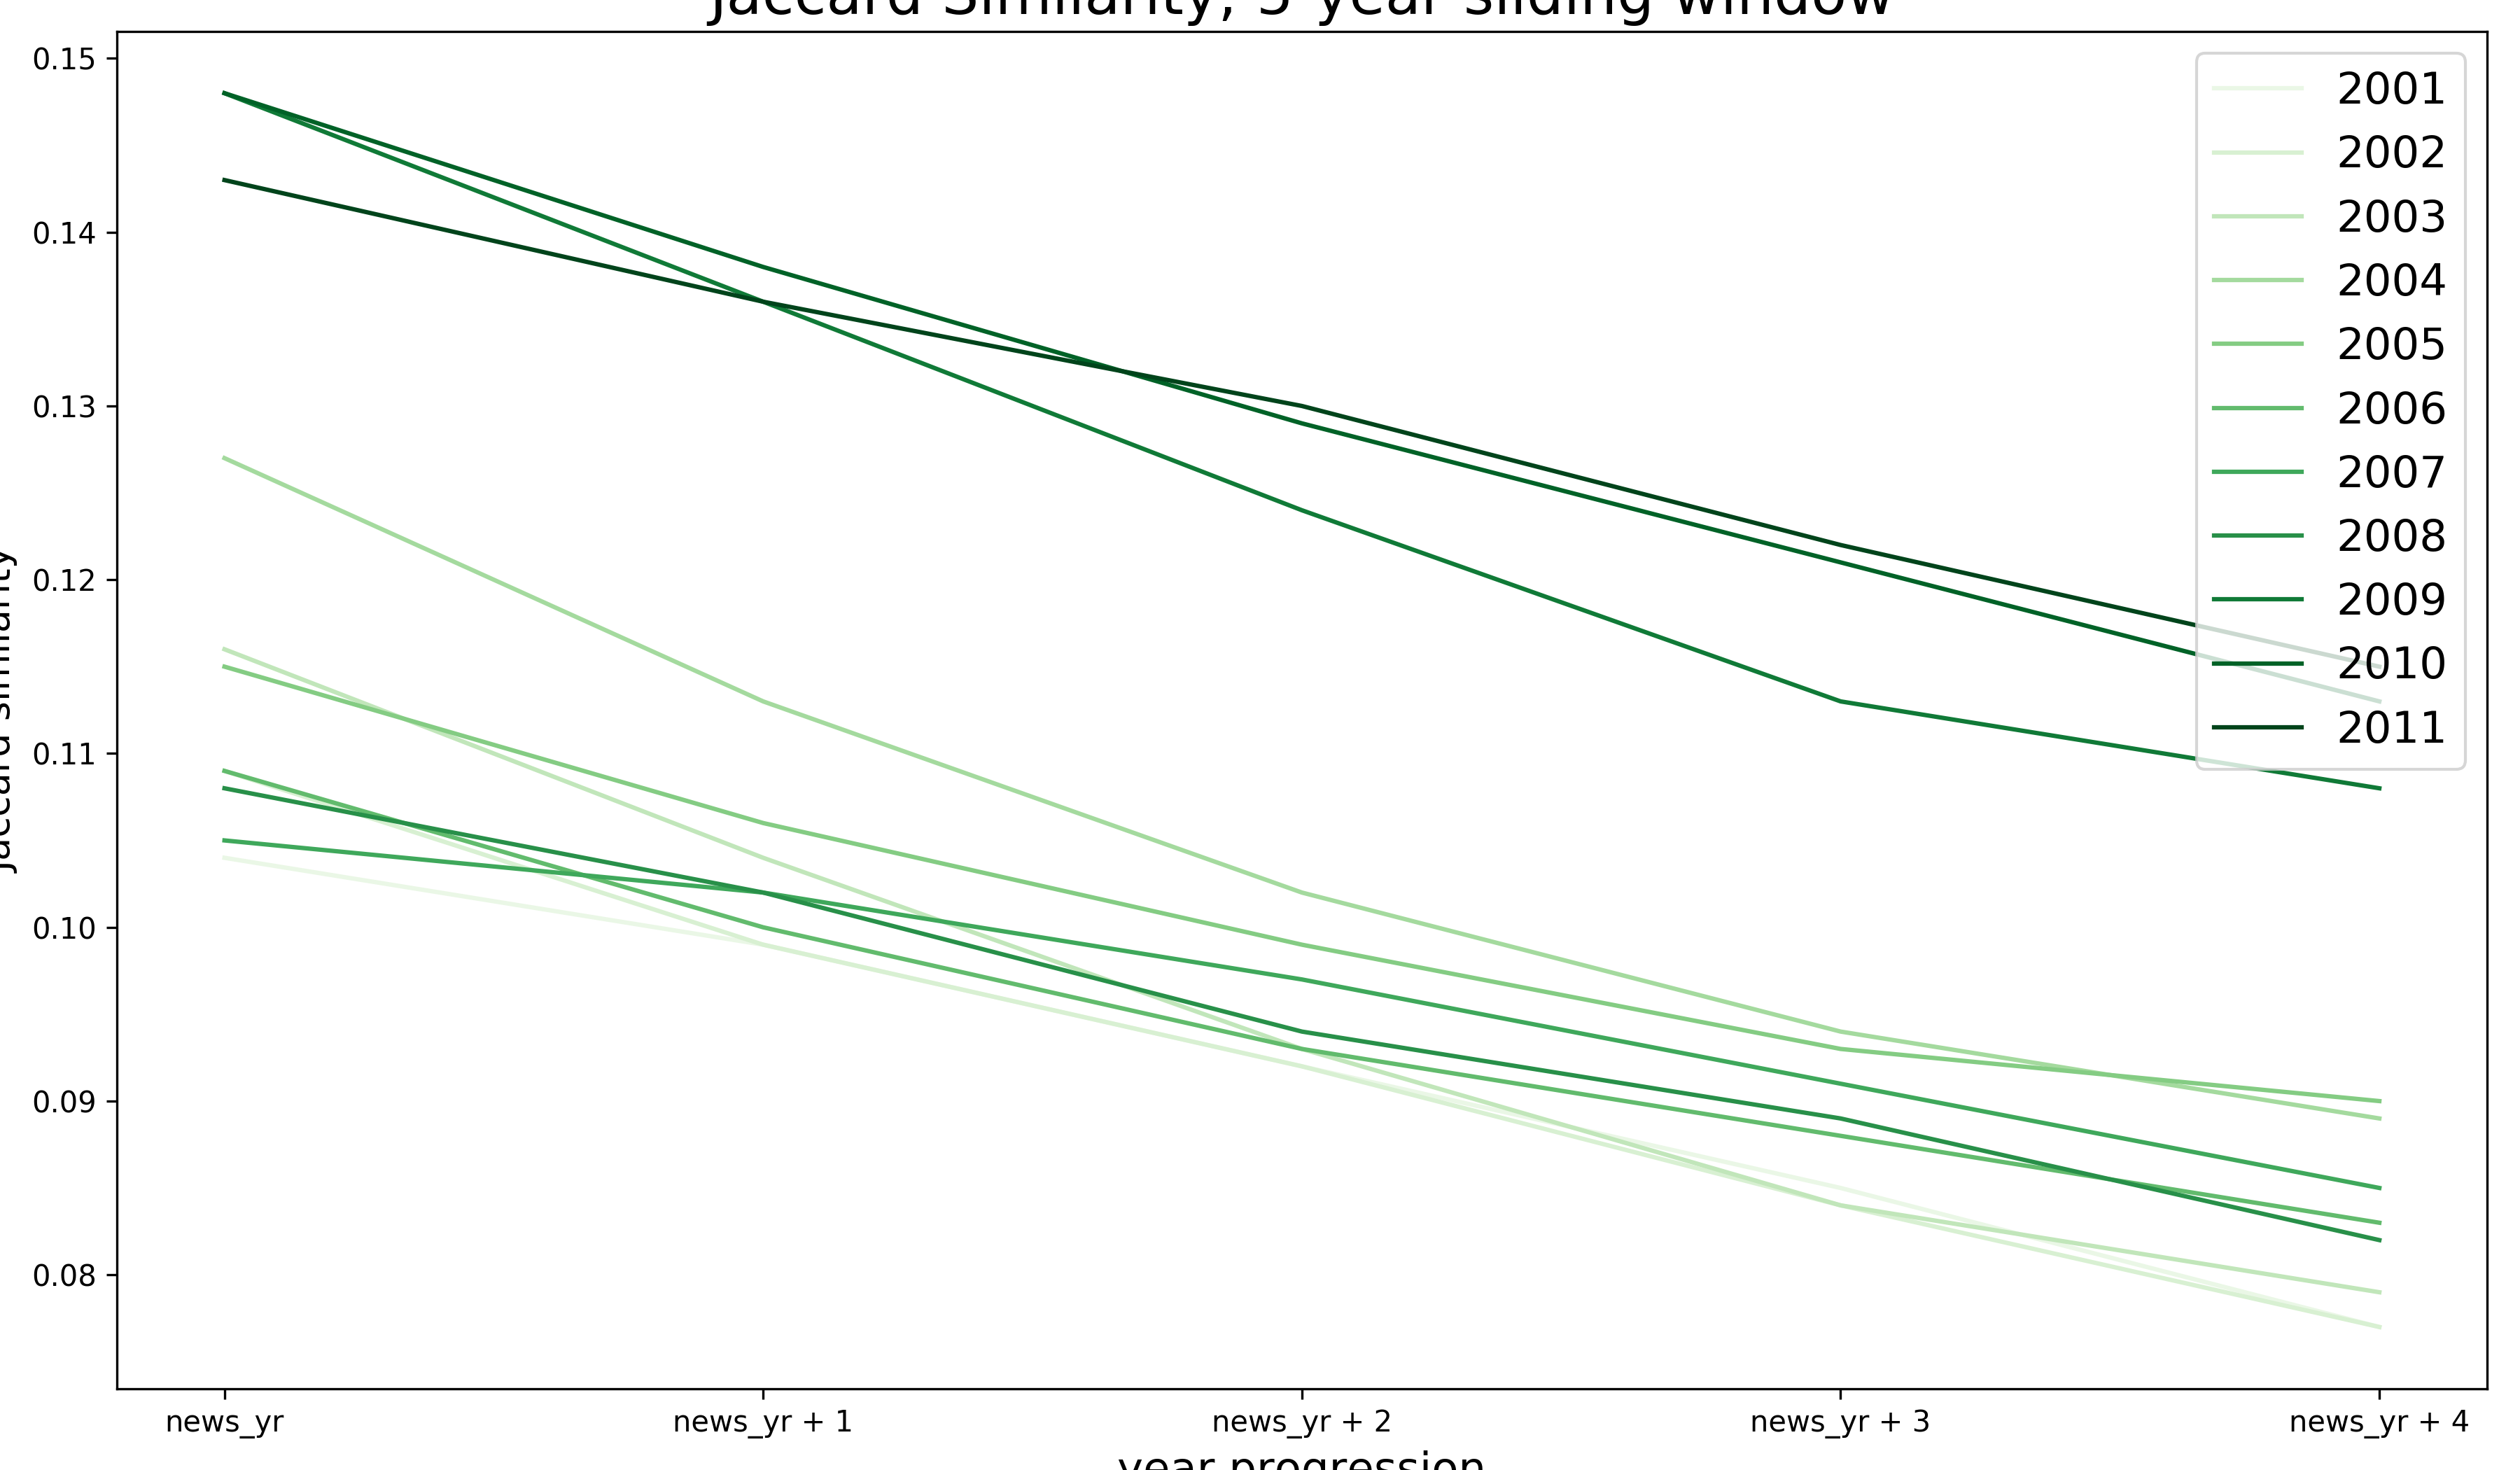

In [44]:
PATH = "/Users/swalkow2/Documents/GitHub/final_projects/Graphs/"
Image(filename = PATH + "jaccard_similarity.png", width=650, height=650)


Jarrcid is defined as number of words that appear in corpus and divide by the total number of words in corpus. We can see as time goes by the number of words in both the news and in song lyrics decrease. 

### Sentiment Analysis

In [28]:
df_sentiment_lyrics = pd.read_csv("LyricsSentimentScores.csv")
df_sentiment_lyrics.head(5)
## comp - measure of 'emotional'
## pos - meausre of positivity
## neg - measure of negativity
## neu - indicates a neutral term

,Unnamed: 0,pos,neg,neu,comp,tag
0,0,0.180,0.110,0.710,0.9269,2001
1,1,0.413,0.148,0.439,0.9924,2001
2,2,0.336,0.124,0.540,0.9977,2001
3,3,0.228,0.011,0.761,0.9921,2001
4,4,0.250,0.229,0.521,0.7184,2001


In [29]:
df_sentiment_news = pd.read_csv("NewsSentimentScores.csv")
df_sentiment_news.head(5)

,Unnamed: 0,pos,neg,neu,comp,tag
0,0,0.083,0.404,0.513,-0.9729,2001
1,1,0.080,0.160,0.760,-0.7096,2001
2,2,0.156,0.131,0.713,0.2732,2001
3,3,0.083,0.239,0.678,-0.7430,2001
4,4,0.186,0.328,0.485,-0.8957,2001


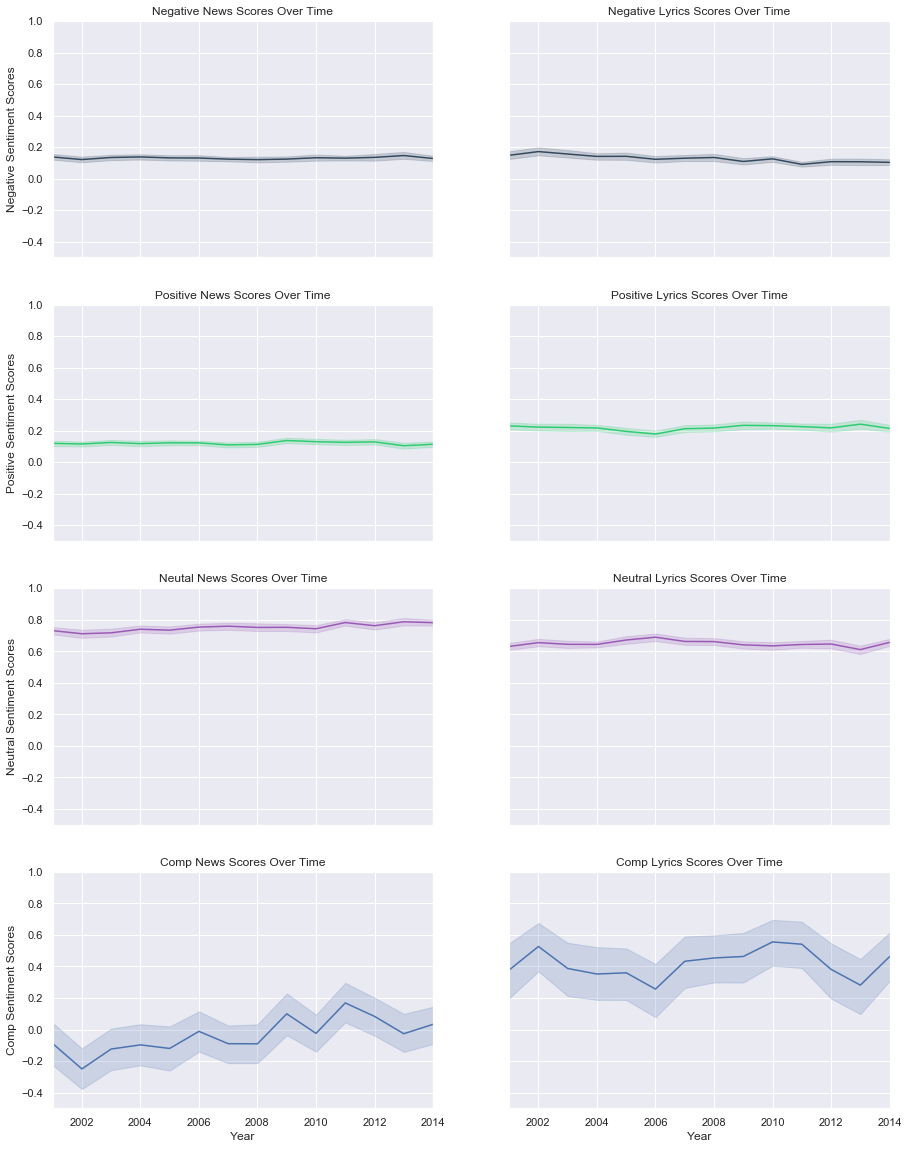

In [57]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, sharey=True, sharex=True, figsize=(15,20))

s = sns.relplot(x="tag", y='neg', color="#34495e",
            kind="line", legend="full", ax=ax1, data=df_sentiment_lyrics);
ax1.set(title='Negative News Scores Over Time')
ax1.set(ylabel='Negative Sentiment Scores')
ax1.set(xlabel='Year')
ax1.set(ylim=(-.5, 1))
ax1.set(xlim=(2001, 2014))
plt.close()

a = sns.relplot(x="tag", y="neg", color="#34495e",
            kind="line", legend="full", ax=ax2, data=df_sentiment_news);

ax2.set(title='Negative Lyrics Scores Over Time')
ax2.set(xlabel='Year')
ax2.set(ylabel='Negative Sentiment Scores')
ax2.set(ylim=(-.5, 1))
ax2.set(xlim=(2001, 2014))
plt.close()

t = sns.relplot(x="tag", y="pos", ax=ax3, color="#2ecc71",
            kind="line", legend="full", data=df_sentiment_news);
ax3.set(title='Positive News Scores Over Time')
ax3.set(ylabel='Positive Sentiment Scores')
ax3.set(xlabel='Year')
ax3.set(ylim=(-.5, 1))
ax3.set(xlim=(2001, 2014))
plt.close()

q = sns.relplot(x="tag", y='pos', ax=ax4,color="#2ecc71",
            kind="line", legend="full", data=df_sentiment_lyrics);
ax4.set(title='Positive Lyrics Scores Over Time')
ax4.set(ylabel='Positive Sentiment Scores')
ax4.set(xlabel='Year')
ax4.set(ylim=(-.5, 1))
ax4.set(xlim=(2001, 2014))
plt.close()

y = sns.relplot(x="tag", y="neu", ax=ax5, color="#9b59b6",
            kind="line", legend="full", data=df_sentiment_news);
ax5.set(title='Neutal News Scores Over Time')
ax5.set(ylabel='Neutral Sentiment Scores')
ax5.set(xlabel='Year')
ax5.set(ylim=(-.5, 1))
ax5.set(xlim=(2001, 2014))
plt.close()

w = sns.relplot(x="tag", y='neu', ax=ax6, color="#9b59b6",
            kind="line", legend="full", data=df_sentiment_lyrics);
ax6.set(title='Neutral Lyrics Scores Over Time')
ax6.set(ylabel='Neutral Sentiment Scores')
ax6.set(xlabel='Year')
ax6.set(ylim=(-.5, 1))
ax6.set(xlim=(2001, 2014))
plt.close()

o = sns.relplot(x="tag", y="comp", ax=ax7,
            kind="line", legend="full", data=df_sentiment_news);
ax7.set(title='Comp News Scores Over Time')
ax7.set(ylabel='Comp Sentiment Scores')
ax7.set(xlabel='Year')
ax7.set(ylim=(-.5, 1))
ax7.set(xlim=(2001, 2014))
plt.close()


c = sns.relplot(x="tag", y='comp', ax=ax8,
            kind="line", legend="full", data=df_sentiment_lyrics);
ax8.set(title='Comp Lyrics Scores Over Time')
ax8.set(ylabel='Comp Sentiment Scores')
ax8.set(xlabel='Year')
ax8.set(ylim=(-.5, 1))
ax8.set(xlim=(2001, 2014))
plt.close()


### Topic Modeling
- a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents
- The "topics" produced by topic modeling techniques are clusters of similar words

In [14]:
df_topics_combined = pd.read_csv("/Users/swalkow2/Documents/GitHub/final_projects/dominant_topic_combined_10_topics.csv")
df_topics_combined.head(5)

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Year,Tag
0,0,0,7.0,0.1615,"night, tonight, run, dance, rock, people, worl...",im desperate changing starving truth im closer...,2001,lyrics
1,1,1,8.0,0.2617,"love, baby, ill, give, make, heart, break, fee...",keep fallin love sometimes love ya sometimes m...,2001,lyrics
2,2,2,4.0,0.3045,"girl, make, boy, man, body, hot, head, ride, s...",girls party look body shakin thing like never ...,2001,lyrics
3,3,3,3.0,0.1987,"thing, make, hard, call, home, long, change, f...",back atmosphere drops jupiter hair hey acts li...,2001,lyrics
4,4,4,2.0,0.3291,"time, feel, life, find, live, day, mind, lose,...",called phone said im comin hope alone cause go...,2001,lyrics


In [15]:
words = df_topics_combined.groupby('Keywords')['Dominant_Topic'].unique()
words.sort_values(ascending=True)

Keywords
good, back, move, stop, bring, low, leave, club, beat, time                                            [0.0]
include, report, article_discusse, government, effort, official, country, focus, campaign, american    [1.0]
time, feel, life, find, live, day, mind, lose, leave, bad                                              [2.0]
thing, make, hard, call, home, long, change, friend, lie, talk                                         [3.0]
girl, make, boy, man, body, hot, head, ride, show, put                                                 [4.0]
year, state, case, increase, law, school, company, bill, rise, federal                                 [5.0]
turn, hand, light, put, walk, hold, place, side, dream, hear                                           [6.0]
night, tonight, run, dance, rock, people, world, start, song, party                                    [7.0]
love, baby, ill, give, make, heart, break, feel, crazy, hate                                           [8.0]
money, giv

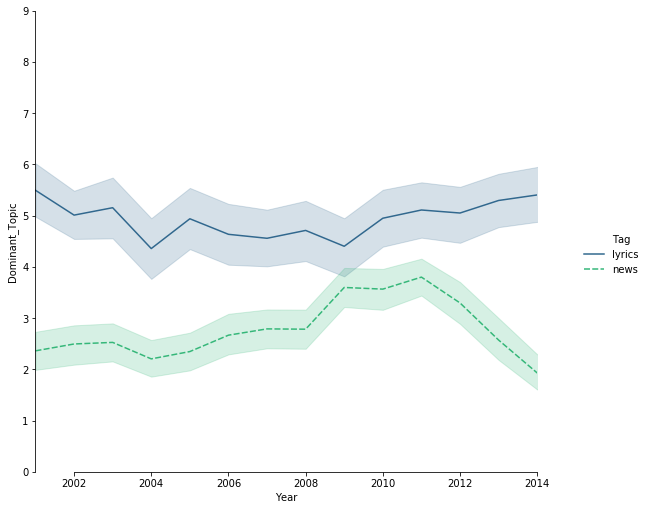

In [16]:
h = sns.relplot(x="Year", y="Dominant_Topic", kind="line", hue ='Tag', style="Tag",
            legend= 'full', palette='viridis',
            data=df_topics_combined);
h.fig.set_size_inches(9.5, 7.5)
h.set(ylim=(0, 9))
h.set(xlim=(2001, 2014))
h.despine(trim=True)

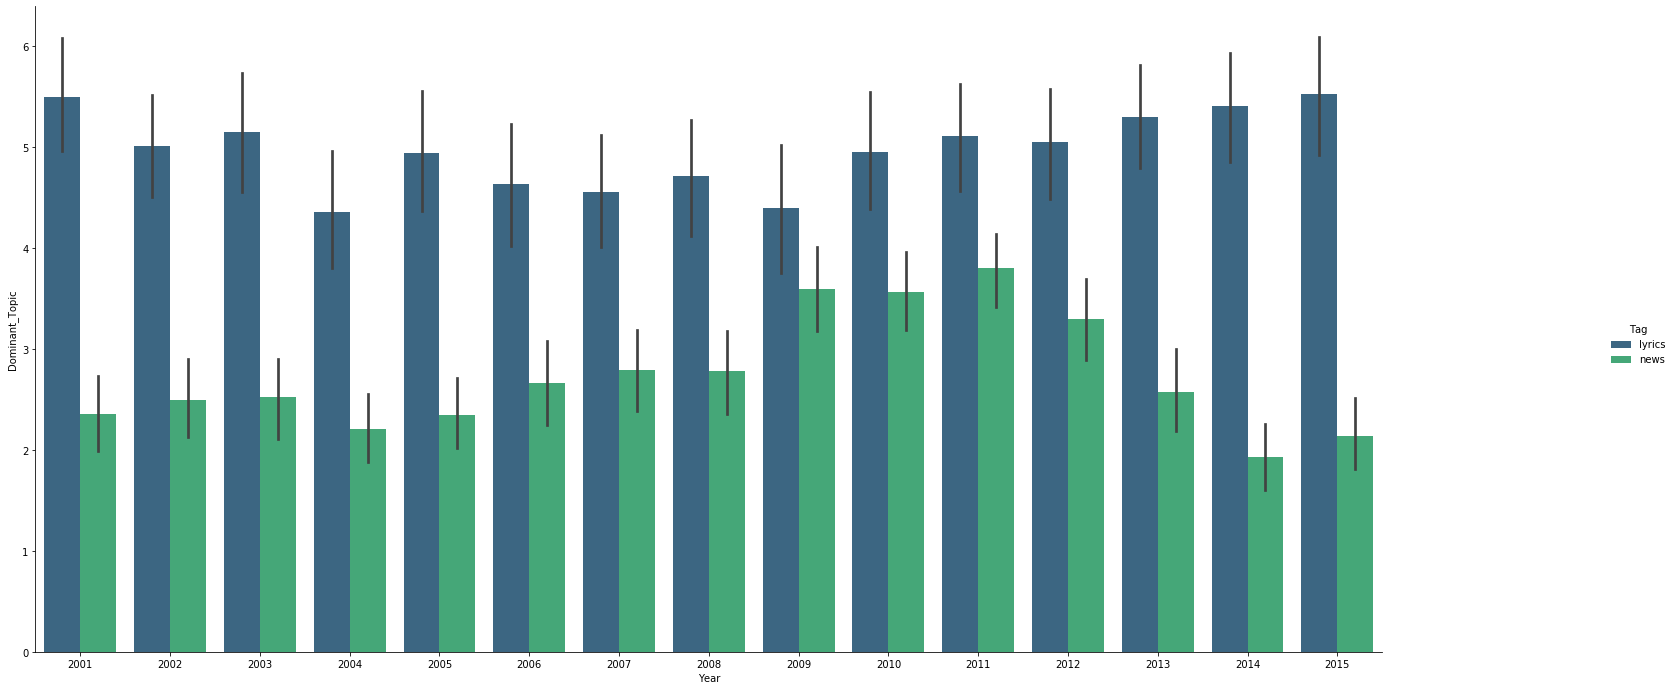

In [21]:
b = sns.catplot(x="Year", y="Dominant_Topic", kind="bar", hue ='Tag', 
            legend= 'full', palette='viridis',
            data=df_topics_combined);
b.fig.set_size_inches(25.5, 10.5)

## Conclusions

>1. Popular songs (lyrics) and news coming out during the same period of time (etc, five years from 2001 to 2005) share certain features that were shaped by the culture and theme of the society during that period.
>2. There will be a time delay between the similar groups of topics extracted from news and then those of the songs. Since news always comes out quickly right after the things happened, while it takes a long time to write and publish a song.

- We saw some patterns in the common words with a time delay, but the sample was quite small
- We saw some patterns in topic modeling, where the topics over lap at topic four
- We saw some patterns the sentiment analysis with overall emotionality

A larger sample, and a more targeted approach is needed with the news datasets (maybe just opinion pieces?)

## Limitations
- lyrics length is longer
- missing lyrics
- repetition in lyrics
- repeated words in news
    - these repitions don't cross over often
- news reports contain factual events and are concerned with accuracy
- lyrics reflect culture and emotions